In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"G:\Data Science Project\Churn Data Analysis\Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replaces blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [5]:
print(df["TotalCharges"].dtype)

float64


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

0

converted 0 and 1 values of SeniorCitizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else :
        return "No"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


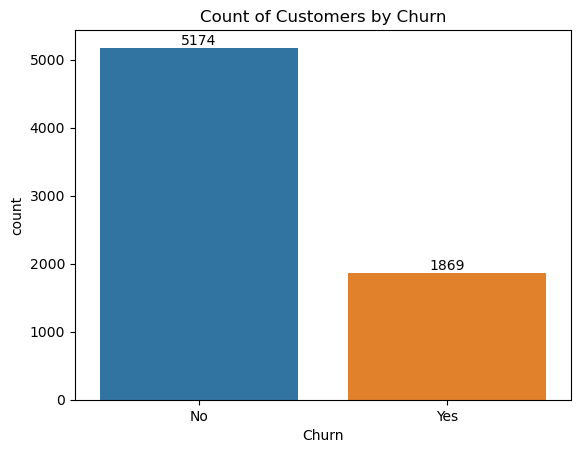

In [11]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [12]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


In [13]:
gb.index

Index(['No', 'Yes'], dtype='object', name='Churn')

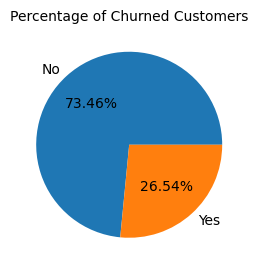

In [14]:
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"], labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

from the given pie chart we can conclude that 26.54% of our customers have churned out.

now let's explore the reason behind it.

Text(0.5, 1.0, 'Churned by Gender')

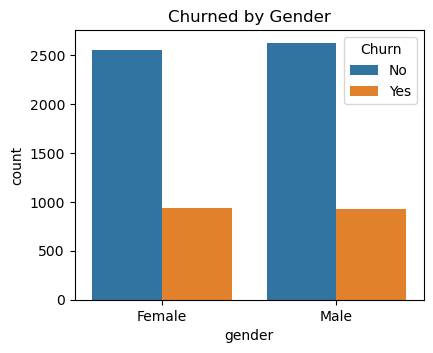

In [15]:
plt.figure(figsize = (4.5,3.5))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churned by Gender")

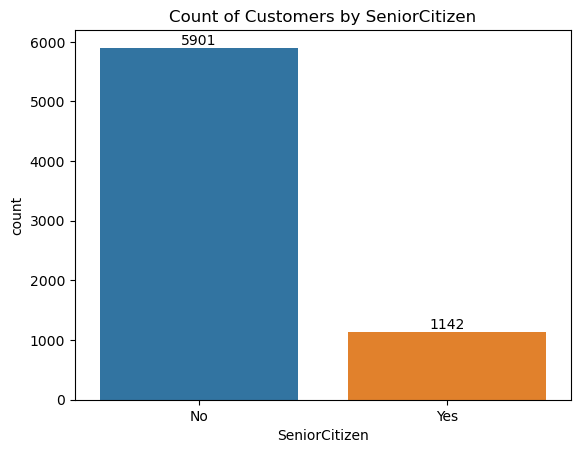

In [16]:
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

Text(0.5, 1.0, 'Churned by SeniorCitizen')

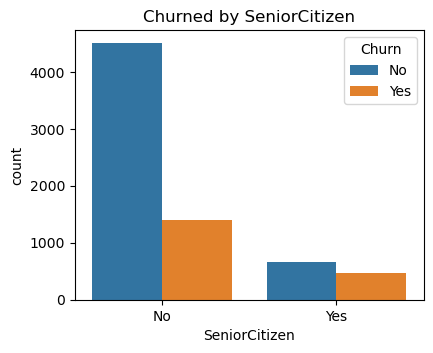

In [17]:
plt.figure(figsize = (4.5,3.5))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churned by SeniorCitizen")

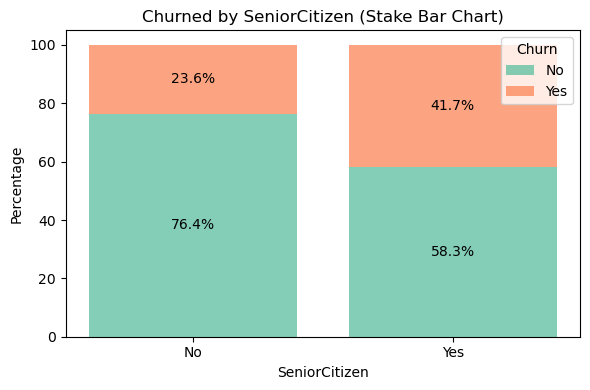

In [18]:
# Calculate percentages
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
total = grouped.groupby('SeniorCitizen')['Count'].transform('sum')
grouped['Percentage'] = (grouped['Count'] / total) * 100

# Pivot to reshape data for stacked bar
pivot_data = grouped.pivot(index='SeniorCitizen', columns='Churn', values='Percentage').fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
bottom = None
colors = sns.color_palette("Set2", len(pivot_data.columns))
for churn, color in zip(pivot_data.columns, colors):
    ax.bar(
        pivot_data.index,
        pivot_data[churn],
        bottom=bottom,
        label=churn,
        color=color,
        alpha=0.8
    )
    bottom = pivot_data[churn] if bottom is None else bottom + pivot_data[churn]

# Add percentage labels
for idx, row in pivot_data.iterrows():
    cumulative = 0
    for churn, value in row.items():
        plt.text(
            idx,
            cumulative + value / 2,
            f"{value:.1f}%",
            ha="center",
            va="center",
            fontsize=10,
            color="black"
        )
        cumulative += value

# Customize plot
plt.title("Churned by SeniorCitizen (Stake Bar Chart)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.xticks(ticks=pivot_data.index, labels=["No", "Yes"])
plt.legend(title="Churn")
plt.tight_layout()

plt.show()

Comparative a greater percentage of people in SeniorCitizen category have churned

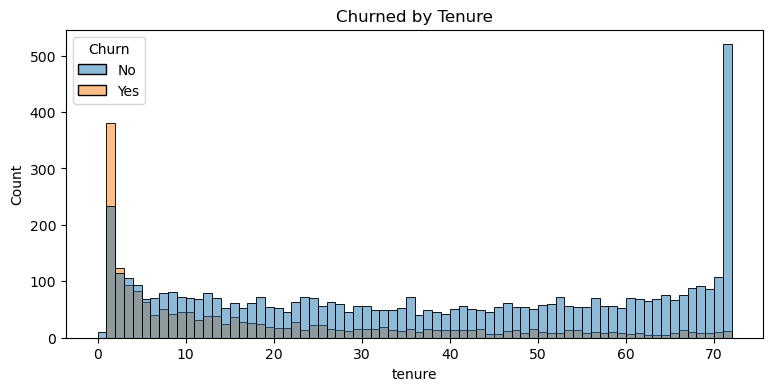

In [19]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.title("Churned by Tenure")
plt.show()

people who have used our services for a long time have stayed and people who have used our services for 1/2 months have churned

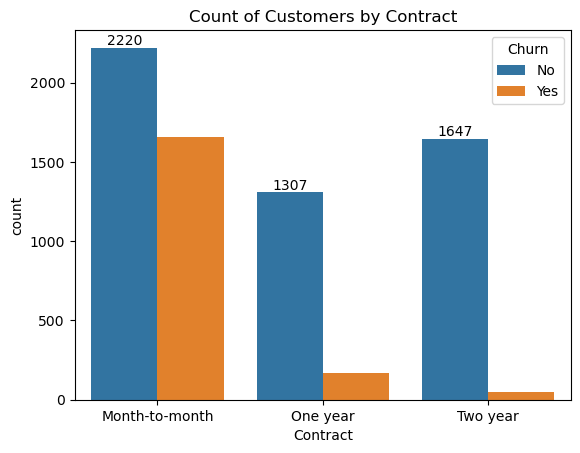

In [20]:
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

people who have month to month contract are likely to churn from then those who have 1 or 2 years of contract

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

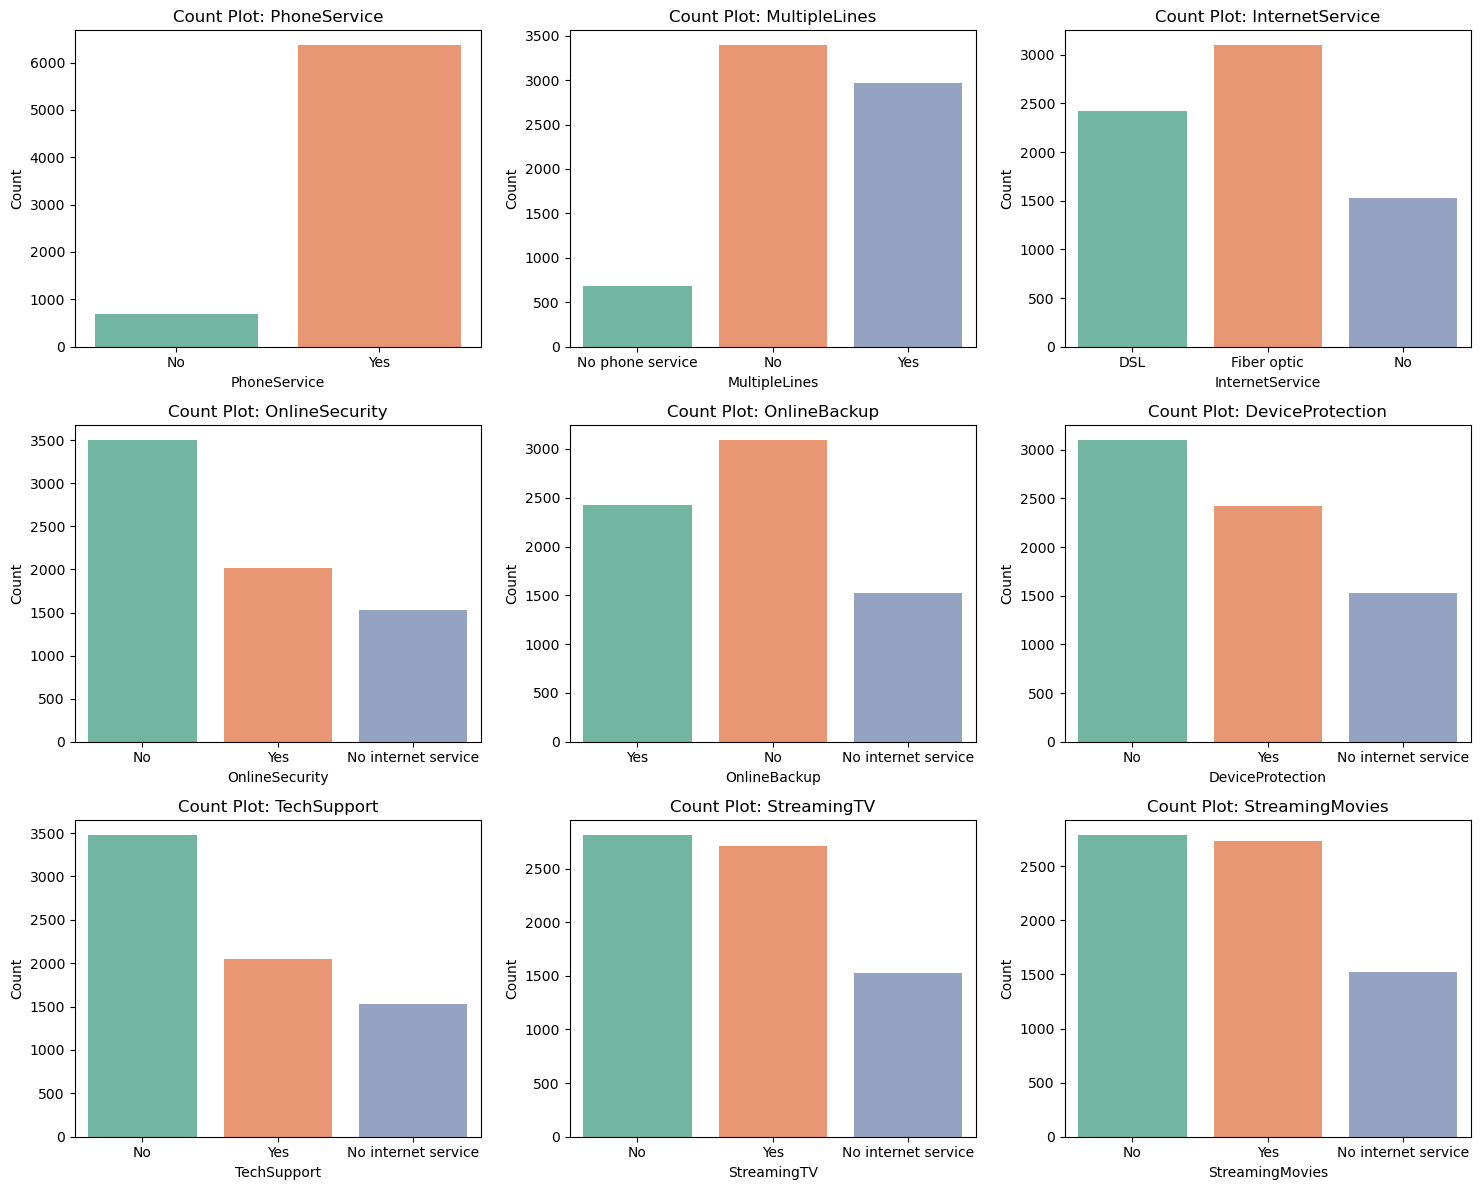

In [22]:
# Columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of subplots (determine the layout)
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns) // n_cols)  # Calculate rows dynamically using ceiling

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten axes array to iterate easily

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Count Plot: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Turn off any unused axes
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


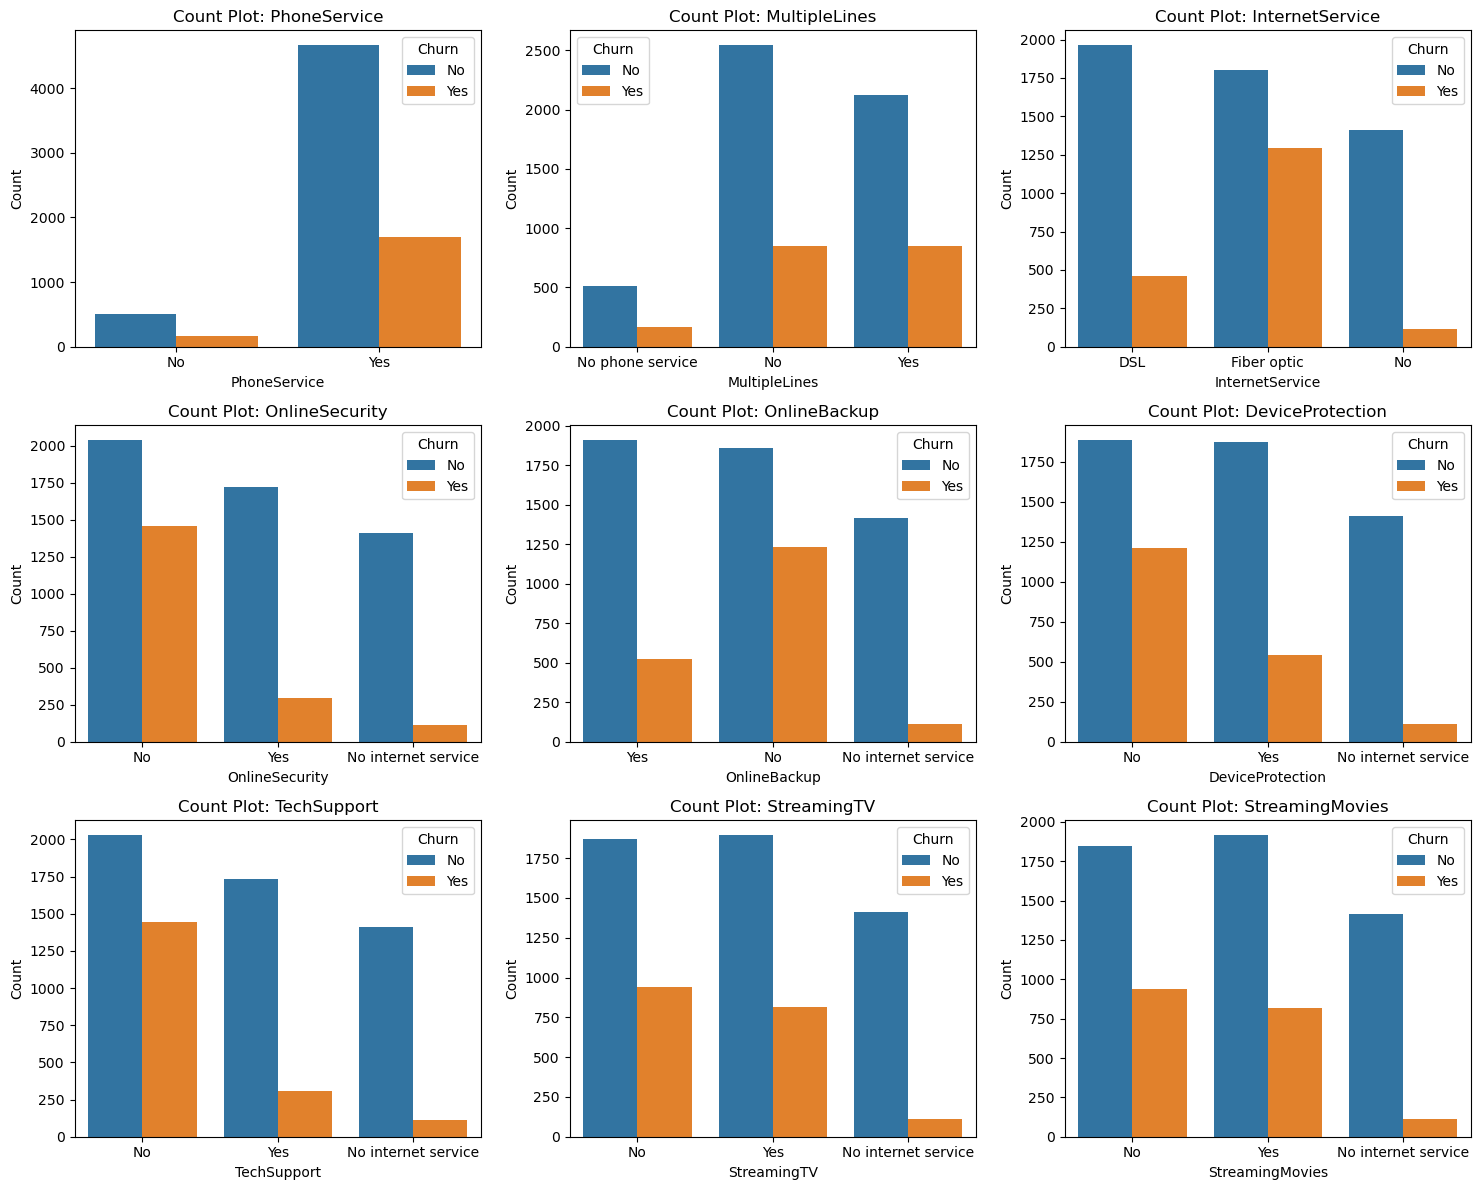

In [24]:
# Columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of subplots (determine the layout)
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns) // n_cols)  # Calculate rows dynamically using ceiling

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  # Flatten axes array to iterate easily

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f"Count Plot: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Turn off any unused axes
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


The visualizations show customer churn distributions across various services. Customers with **Fiber optic Internet** and **no online services** like OnlineSecurity, OnlineBackup, and DeviceProtection exhibit higher churn rates. Additionally, customers without **TechSupport** or Streaming services tend to churn more. PhoneService and MultipleLines generally have lower churn compared to other categories.

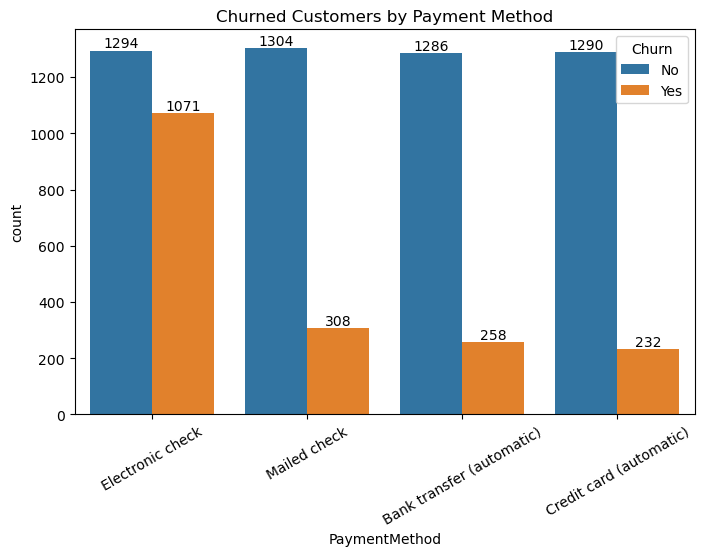

In [42]:
plt.figure(figsize = (8,5))
# sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
# plt.title("Churned Customers by Payment Method")

ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 30)
plt.title("Churned Customers by Payment Method")
plt.show()

customer is likely to churn when he is using Electronic Check as a Payment Method